### Covid Nashville Project

#### Import library

In [35]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from credentials import user, password, server

#### Formatting

In [2]:
%matplotlib inline

In [3]:
engine = create_engine("postgres+psycopg2://"+user+":"\
                       +password+"@"\
                       +server+":5432/covid_data")

In [4]:
colleges = pd.read_sql("SELECT * FROM colleges;", con=engine)
colleges.head()

,date,state,county,city,ipeds_id,college,cases,notes
0,2020-11-05,Alabama,Madison,Huntsville,100654,Alabama A&M University,41.0,None
1,2020-11-05,Alabama,Montgomery,Montgomery,100724,Alabama State University,NaN,None
2,2020-11-05,Alabama,Limestone,Athens,100812,Athens State University,23.0,None
3,2020-11-05,Alabama,Lee,Auburn,100858,Auburn University,2047.0,None
4,2020-11-05,Alabama,Montgomery,Montgomery,100830,Auburn University at Montgomery,80.0,None


In [5]:
mask_use = pd.read_sql("SELECT * FROM mask_use;", con=engine)
mask_use.head()

,county_fips,never,rarely,sometimes,frequently,always
0,01001,0.053,0.074,0.134,0.295,0.444
1,01003,0.083,0.059,0.098,0.323,0.436
2,01005,0.067,0.121,0.120,0.201,0.491
3,01007,0.020,0.034,0.096,0.278,0.572
4,01009,0.053,0.114,0.180,0.194,0.459


In [6]:
states = pd.read_sql("SELECT * FROM states;", con=engine)
states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [7]:
counties = pd.read_sql("SELECT * FROM counties;", con=engine)
counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0
2,2020-01-23,Snohomish,Washington,53061,1,0
3,2020-01-24,Cook,Illinois,17031,1,0
4,2020-01-24,Snohomish,Washington,53061,1,0


In [8]:
us_totals = pd.read_sql("SELECT * FROM us_totals;", con=engine)
us_totals.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [9]:
businesses_df = pd.read_csv('../data/businesses.csv')
businesses_df.head()

,address,vicinity,name,type
0,"2440 COUCHVILLE PIKE, Nashville","2440 Couchville Pike, Nashville",Wilson Sporting Goods Co,"['point_of_interest', 'establishment']"
1,"1613 Buchanan St, Nashville","1613 Buchanan Street, Nashville",Coin Cloud Bitcoin ATM,"['atm', 'finance', 'point_of_interest', 'estab..."
2,"1613 Buchanan St, Nashville","1613 Buchanan Street, Nashville",Discounts Mart,"['convenience_store', 'food', 'point_of_intere..."
3,"1613 Buchanan St, Nashville","1613 Buchanan Street, Nashville",Northwest Liquors,"['liquor_store', 'point_of_interest', 'store',..."
4,"306 White Bridge Pike, Nashville","306 White Bridge Pike, Nashville",Suds Up Car Wash of West Nashville,"['car_wash', 'point_of_interest', 'establishme..."


In [10]:
type(businesses_df)

pandas.core.frame.DataFrame

In [11]:
clusters_df = pd.read_csv('../data/clusters.csv')
clusters_df.head()

,Cluster Name,Facility Type,Cluster Start Date,# Cases,Latitude,Longitude
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.144703,-86.802655
1,Event at Clementine Hall,Social Gathering,3/14/2020,23,36.152444,-86.844583
2,Religious Retreat,Social Gathering,3/25/2020,18,NaN,NaN
3,The Health Center at Richland Place,LTCF,4/3/2020,47,36.128750,-86.817345
4,Trevecca Center for Rehab and Healing,LTCF,4/4/2020,102,36.144562,-86.754560


In [12]:
hubnash_df = pd.read_csv('../data/hubNashville__311__Service_Requests.csv', low_memory=False)
hubnash_df.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,353977,Closed,COVID-19,COVID-19 - Submit Input about The Plan to Reop...,COVID-19 - Submit Input about The Plan to Reop...,04/28/2020 02:33:22 PM,04/28/2020 02:33:22 PM,hubNashville Community,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,367021,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,05/13/2020 09:00:52 PM,05/13/2020 09:00:52 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,419194,Closed,"Streets, Roads & Sidewalks",Remove debris in roadway,Roadway,07/17/2020 03:21:03 PM,07/28/2020 04:06:19 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,Lafayette St & Claiborne St,NASHVILLE,17.0,37210,36.148412,-86.761179,"(36.1484116, -86.761179)"
3,366600,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,05/13/2020 04:04:14 PM,05/13/2020 04:04:14 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,408945,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,07/06/2020 05:57:28 PM,07/06/2020 05:57:28 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Part 2. 

Use sqlalchemy to load data for Nashville from the counties table in the covid_data database on AWS. Explore this data. Is there a relationship between the number of cases over time and the number of violations reported over time?

In [13]:
tennessee_counties = counties[counties['state'] == 'Tennessee']
tennessee_counties.head()

,date,county,state,fips,cases,deaths
570,2020-03-05,Williamson,Tennessee,47187,1,0
639,2020-03-06,Williamson,Tennessee,47187,1,0
731,2020-03-07,Williamson,Tennessee,47187,1,0
841,2020-03-08,Davidson,Tennessee,47037,1,0
842,2020-03-08,Shelby,Tennessee,47157,1,0


In [14]:
davidson_cases = tennessee_counties[tennessee_counties['county'] == 'Davidson']
davidson_cases.head()

,date,county,state,fips,cases,deaths
841,2020-03-08,Davidson,Tennessee,47037,1,0
970,2020-03-09,Davidson,Tennessee,47037,1,0
1127,2020-03-10,Davidson,Tennessee,47037,1,0
1323,2020-03-11,Davidson,Tennessee,47037,2,0
1569,2020-03-12,Davidson,Tennessee,47037,6,0


In [15]:
davidson_cases.dtypes

date      object
county    object
state     object
fips      object
cases      int64
deaths     int64
dtype: object

In [16]:
davidson_cases = davidson_cases.reset_index(drop=True)
davidson_cases.head()

,date,county,state,fips,cases,deaths
0,2020-03-08,Davidson,Tennessee,47037,1,0
1,2020-03-09,Davidson,Tennessee,47037,1,0
2,2020-03-10,Davidson,Tennessee,47037,1,0
3,2020-03-11,Davidson,Tennessee,47037,2,0
4,2020-03-12,Davidson,Tennessee,47037,6,0


In [41]:
# converting 'date' from object to datetime
# davidson_cases['date'] = pd.to_datetime(davidson_cases['date'], format='%Y%m%d')


#Get the month change to datetimeto datetime format
davidson_cases['datetime'] = pd.DatetimeIndex(davidson_cases['date']).month
davidson_cases

,date,county,state,fips,cases,deaths,datetime
0,2020-03-08,Davidson,Tennessee,47037,1,0,3
1,2020-03-09,Davidson,Tennessee,47037,1,0,3
2,2020-03-10,Davidson,Tennessee,47037,1,0,3
3,2020-03-11,Davidson,Tennessee,47037,2,0,3
4,2020-03-12,Davidson,Tennessee,47037,6,0,3
...,...,...,...,...,...,...,...
249,2020-11-12,Davidson,Tennessee,47037,38802,374,11
250,2020-11-13,Davidson,Tennessee,47037,39101,379,11
251,2020-11-14,Davidson,Tennessee,47037,39411,380,11
252,2020-11-15,Davidson,Tennessee,47037,39843,382,11


In [18]:
davidson_cases.dtypes

date        object
county      object
state       object
fips        object
cases        int64
deaths       int64
datetime     int64
dtype: object

In [46]:
# tried to find the sum here by date, but I believe there is only one entry per day anyways in this df so it's usless

#hubnash_coivd_group_month = hubnash_covid.groupby('month')['Date_Opened'].count().reset_index()
davidson_bydate = davidson_cases.groupby('datetime')['cases'].max().reset_index()
davidson_bydate

,datetime,cases
0,3,541
1,4,2669
2,5,5285
3,6,9805
4,7,21060
5,8,25975
6,9,29005
7,10,34900
8,11,40433


[Text(0, 0, ''),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November')]

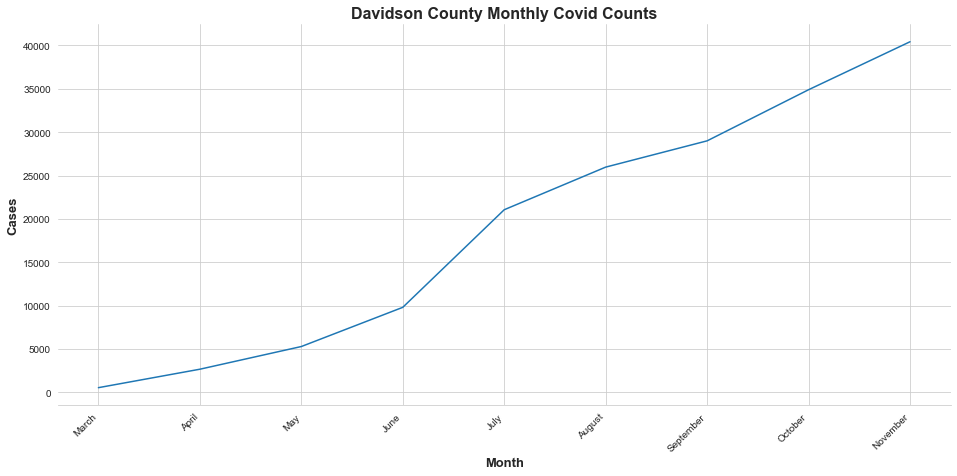

In [48]:
#Create subplot
#note for plotting exploration analysis https://towardsdatascience.com/data-visualization-cheat-sheet-with-seaborn-and-matplotlib-70cac11c6517
sns.set_style('whitegrid')
fig,ax=plt.subplots(figsize=(16,7))
#Create lineplot
chart=sns.lineplot(x=davidson_bydate['datetime'], y=davidson_bydate['cases'],ax=ax)
sns.despine(left=True)

#Customize chart
chart.set_xlabel('Month',weight='bold',fontsize=13)
chart.set_ylabel('Cases', weight='bold',fontsize=13)
chart.set_title('Davidson County Monthly Covid Counts',weight='bold',fontsize=16)
chart.set_xticklabels(['','March','April','May','June','July','August','September','October','November'], rotation = 45, ha="right")

##### I will need to subset the hub_nashville data and then join that to the davidson df.

In [20]:
# subsetting the hub_nashville data and getting only the covid related ones.

hubnash_df_covidrequest = hubnash_df[hubnash_df['Request Type'] == 'COVID-19']
hubnash_df_covidrequest.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,353977,Closed,COVID-19,COVID-19 - Submit Input about The Plan to Reop...,COVID-19 - Submit Input about The Plan to Reop...,04/28/2020 02:33:22 PM,04/28/2020 02:33:22 PM,hubNashville Community,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,407665,Closed,COVID-19,COVID-19 Questions,COVID-19 Questions,07/04/2020 07:53:35 PM,07/07/2020 02:35:48 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,346122,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/15/2020 11:33:26 AM,04/16/2020 02:55:01 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,928 6th Ave S,NASHVILLE,17.0,37203,36.14904,-86.772273,"(36.1490396, -86.77227289999999)"
86,354331,Closed,COVID-19,COVID-19 Questions,COVID-19 Questions,04/28/2020 07:32:58 PM,05/08/2020 07:13:25 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,417138,Closed,COVID-19,COVID-19 Guidance for Reopening Businesses,COVID-19 Guidance for Reopening Businesses,07/15/2020 05:11:38 PM,07/22/2020 08:59:58 PM,Phone,NaN,NaN,...,False,NaN,False,Charlotte Pike,NASHVILLE,22.0,37209,36.11487,-86.925890,"(36.11487, -86.92589)"


In [21]:
hubnash_covid_violations = hubnash_df_covidrequest[hubnash_df_covidrequest['Subrequest Type'] == 'COVID-19 Violations']
hubnash_covid_violations.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
61,346122,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/15/2020 11:33:26 AM,04/16/2020 02:55:01 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,928 6th Ave S,NASHVILLE,17.0,37203,36.149040,-86.772273,"(36.1490396, -86.77227289999999)"
95,339374,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/04/2020 06:13:59 PM,04/09/2020 01:07:22 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,500 Gallatin Ave,NASHVILLE,5.0,37206,36.181548,-86.749695,"(36.181548, -86.749695)"
110,343513,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/10/2020 10:40:08 AM,04/14/2020 07:39:09 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,5720 Crossings Blvd,NaN,NaN,NaN,36.039608,-86.646541,"(36.039608, -86.646541)"
113,442996,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/12/2020 02:05:29 AM,08/12/2020 04:03:35 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,7689 Hwy 70 S,NASHVILLE,22.0,37221,36.078933,-86.953400,"(36.07893290000001, -86.9533998)"
118,339423,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/04/2020 08:12:27 PM,04/09/2020 02:21:09 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,5310 Mt View Rd,ANTIOCH,32.0,37013,36.048182,-86.648447,"(36.0481819, -86.6484474)"


In [22]:
hubnash_covid_violations = hubnash_covid_violations.reset_index(drop=True)
hubnash_covid_violations.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,346122,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/15/2020 11:33:26 AM,04/16/2020 02:55:01 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,928 6th Ave S,NASHVILLE,17.0,37203,36.149040,-86.772273,"(36.1490396, -86.77227289999999)"
1,339374,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/04/2020 06:13:59 PM,04/09/2020 01:07:22 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,500 Gallatin Ave,NASHVILLE,5.0,37206,36.181548,-86.749695,"(36.181548, -86.749695)"
2,343513,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/10/2020 10:40:08 AM,04/14/2020 07:39:09 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,5720 Crossings Blvd,NaN,NaN,NaN,36.039608,-86.646541,"(36.039608, -86.646541)"
3,442996,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/12/2020 02:05:29 AM,08/12/2020 04:03:35 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,7689 Hwy 70 S,NASHVILLE,22.0,37221,36.078933,-86.953400,"(36.07893290000001, -86.9533998)"
4,339423,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/04/2020 08:12:27 PM,04/09/2020 02:21:09 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,5310 Mt View Rd,ANTIOCH,32.0,37013,36.048182,-86.648447,"(36.0481819, -86.6484474)"


In [23]:
hubnash_covid_violations.dtypes

Request #                       int64
Status                         object
Request Type                   object
Subrequest Type                object
Additional Subrequest Type     object
Date / Time Opened             object
Date / Time Closed             object
Request Origin                 object
System of Origin ID            object
Contact Type                   object
Preferred Language            float64
State Issue                      bool
Parent Request                float64
Closed When Created              bool
Address                        object
City                           object
Council District              float64
ZIP                            object
Latitude                      float64
Longitude                     float64
Mapped Location                object
dtype: object

In [24]:
# converting to datetime

hubnash_covid_violations['date'] = pd.DatetimeIndex(hubnash_covid_violations['Date / Time Opened']).date
hubnash_covid_violations.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location,date
0,346122,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/15/2020 11:33:26 AM,04/16/2020 02:55:01 PM,hubNashville Community,NaN,NaN,...,NaN,False,928 6th Ave S,NASHVILLE,17.0,37203,36.149040,-86.772273,"(36.1490396, -86.77227289999999)",2020-04-15
1,339374,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/04/2020 06:13:59 PM,04/09/2020 01:07:22 PM,hubNashville Community,NaN,NaN,...,NaN,False,500 Gallatin Ave,NASHVILLE,5.0,37206,36.181548,-86.749695,"(36.181548, -86.749695)",2020-04-04
2,343513,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/10/2020 10:40:08 AM,04/14/2020 07:39:09 PM,hubNashville Community,NaN,NaN,...,NaN,False,5720 Crossings Blvd,NaN,NaN,NaN,36.039608,-86.646541,"(36.039608, -86.646541)",2020-04-10
3,442996,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/12/2020 02:05:29 AM,08/12/2020 04:03:35 PM,hubNashville Community,NaN,NaN,...,NaN,False,7689 Hwy 70 S,NASHVILLE,22.0,37221,36.078933,-86.953400,"(36.07893290000001, -86.9533998)",2020-08-12
4,339423,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/04/2020 08:12:27 PM,04/09/2020 02:21:09 PM,hubNashville Community,NaN,NaN,...,NaN,False,5310 Mt View Rd,ANTIOCH,32.0,37013,36.048182,-86.648447,"(36.0481819, -86.6484474)",2020-04-04


In [25]:
hubnash_covid_violations['datetime'] = pd.DatetimeIndex(hubnash_covid_violations['date'])
hubnash_covid_violations.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location,date,datetime
0,346122,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/15/2020 11:33:26 AM,04/16/2020 02:55:01 PM,hubNashville Community,NaN,NaN,...,False,928 6th Ave S,NASHVILLE,17.0,37203,36.149040,-86.772273,"(36.1490396, -86.77227289999999)",2020-04-15,2020-04-15
1,339374,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/04/2020 06:13:59 PM,04/09/2020 01:07:22 PM,hubNashville Community,NaN,NaN,...,False,500 Gallatin Ave,NASHVILLE,5.0,37206,36.181548,-86.749695,"(36.181548, -86.749695)",2020-04-04,2020-04-04
2,343513,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/10/2020 10:40:08 AM,04/14/2020 07:39:09 PM,hubNashville Community,NaN,NaN,...,False,5720 Crossings Blvd,NaN,NaN,NaN,36.039608,-86.646541,"(36.039608, -86.646541)",2020-04-10,2020-04-10
3,442996,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/12/2020 02:05:29 AM,08/12/2020 04:03:35 PM,hubNashville Community,NaN,NaN,...,False,7689 Hwy 70 S,NASHVILLE,22.0,37221,36.078933,-86.953400,"(36.07893290000001, -86.9533998)",2020-08-12,2020-08-12
4,339423,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/04/2020 08:12:27 PM,04/09/2020 02:21:09 PM,hubNashville Community,NaN,NaN,...,False,5310 Mt View Rd,ANTIOCH,32.0,37013,36.048182,-86.648447,"(36.0481819, -86.6484474)",2020-04-04,2020-04-04


In [26]:
hubnash_covid_violations.dtypes

Request #                              int64
Status                                object
Request Type                          object
Subrequest Type                       object
Additional Subrequest Type            object
Date / Time Opened                    object
Date / Time Closed                    object
Request Origin                        object
System of Origin ID                   object
Contact Type                          object
Preferred Language                   float64
State Issue                             bool
Parent Request                       float64
Closed When Created                     bool
Address                               object
City                                  object
Council District                     float64
ZIP                                   object
Latitude                             float64
Longitude                            float64
Mapped Location                       object
date                                  object
datetime  

In [27]:
hubnash_covid_violations = hubnash_covid_violations.drop(columns=['Request #', 'Request Origin', 'System of Origin ID', 'Contact Type', 'date'])
hubnash_covid_violations.head()

,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Preferred Language,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location,datetime
0,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/15/2020 11:33:26 AM,04/16/2020 02:55:01 PM,NaN,False,NaN,False,928 6th Ave S,NASHVILLE,17.0,37203,36.149040,-86.772273,"(36.1490396, -86.77227289999999)",2020-04-15
1,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/04/2020 06:13:59 PM,04/09/2020 01:07:22 PM,NaN,False,NaN,False,500 Gallatin Ave,NASHVILLE,5.0,37206,36.181548,-86.749695,"(36.181548, -86.749695)",2020-04-04
2,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/10/2020 10:40:08 AM,04/14/2020 07:39:09 PM,NaN,False,NaN,False,5720 Crossings Blvd,NaN,NaN,NaN,36.039608,-86.646541,"(36.039608, -86.646541)",2020-04-10
3,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/12/2020 02:05:29 AM,08/12/2020 04:03:35 PM,NaN,False,NaN,False,7689 Hwy 70 S,NASHVILLE,22.0,37221,36.078933,-86.953400,"(36.07893290000001, -86.9533998)",2020-08-12
4,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/04/2020 08:12:27 PM,04/09/2020 02:21:09 PM,NaN,False,NaN,False,5310 Mt View Rd,ANTIOCH,32.0,37013,36.048182,-86.648447,"(36.0481819, -86.6484474)",2020-04-04


In [28]:
hubnash_covid_violations_sorted = hubnash_covid_violations.sort_values(by='datetime')
hubnash_covid_violations_sorted.head()

,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Preferred Language,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location,datetime
8897,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,03/29/2020 08:35:22 PM,04/13/2020 03:42:57 PM,NaN,False,NaN,False,12 E Thompson Ln,NASHVILLE,16.0,37211,36.11591,-86.71984,"(36.11591, -86.71984)",2020-03-29
8913,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,03/30/2020 09:50:24 PM,04/10/2020 05:08:54 PM,NaN,False,NaN,False,700 12th Ave S,NASHVILLE,19.0,37203,36.15062,-86.78397,"(36.15062, -86.78397)",2020-03-30
8910,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,03/31/2020 05:27:19 PM,04/09/2020 07:28:17 PM,NaN,False,NaN,False,409 Harding Pl,NASHVILLE,26.0,37211,36.07834,-86.72724,"(36.07834, -86.72724)",2020-03-31
333,New,COVID-19,COVID-19 Violations,COVID-19 Violations,03/31/2020 09:20:41 PM,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-31
8912,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,03/31/2020 03:39:32 AM,04/09/2020 07:27:50 PM,NaN,False,NaN,False,384 Thompson Ln,NASHVILLE,16.0,37211,36.11204,-86.74373,"(36.11204, -86.74373)",2020-03-31


In [29]:
# plotting 2 dataframes on one plot. davidson_cases[date] and hubnash_covid_violations_sorted[datetime]

ax = davidson_cases['date'].plot()

hubnash_covid_violations_sorted['datetime'].plot(ax=ax)

TypeError: no numeric data to plot